## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import sklearn.metrics as metrics
from collections import OrderedDict
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor']='#CDE2E5'

colors = ["#49C3CB", "#7D49CB", "#FFC156", "#365C89", 
             "#E9937E", "#9EE97E", "#F384BC"]

## Importing the dataset 

In [5]:
df = pd.read_excel('/content/Date_Fruit_Datasets.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## Data Analysis

In [6]:
df.shape

(898, 35)

there are 898 observations, each has 35 attributes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [8]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

there are no missing values in our dataset.

In [9]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


### visualiations

In [10]:
df["Class"].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

there are seven classes, each reporesent a type of date fruit. We see how there are distributed in the dataset.

Now lets create a dictionnary that contains each class along with the number of observation for each class

In [11]:
class_dict = df['Class'].value_counts().to_dict()
#sort the dictionary
class_dict = OrderedDict(sorted(class_dict.items()))


class_labels = class_dict.keys()
class_values = class_dict.values()

Text(0.5, 1.0, 'Distribution of \nDate Fruits')

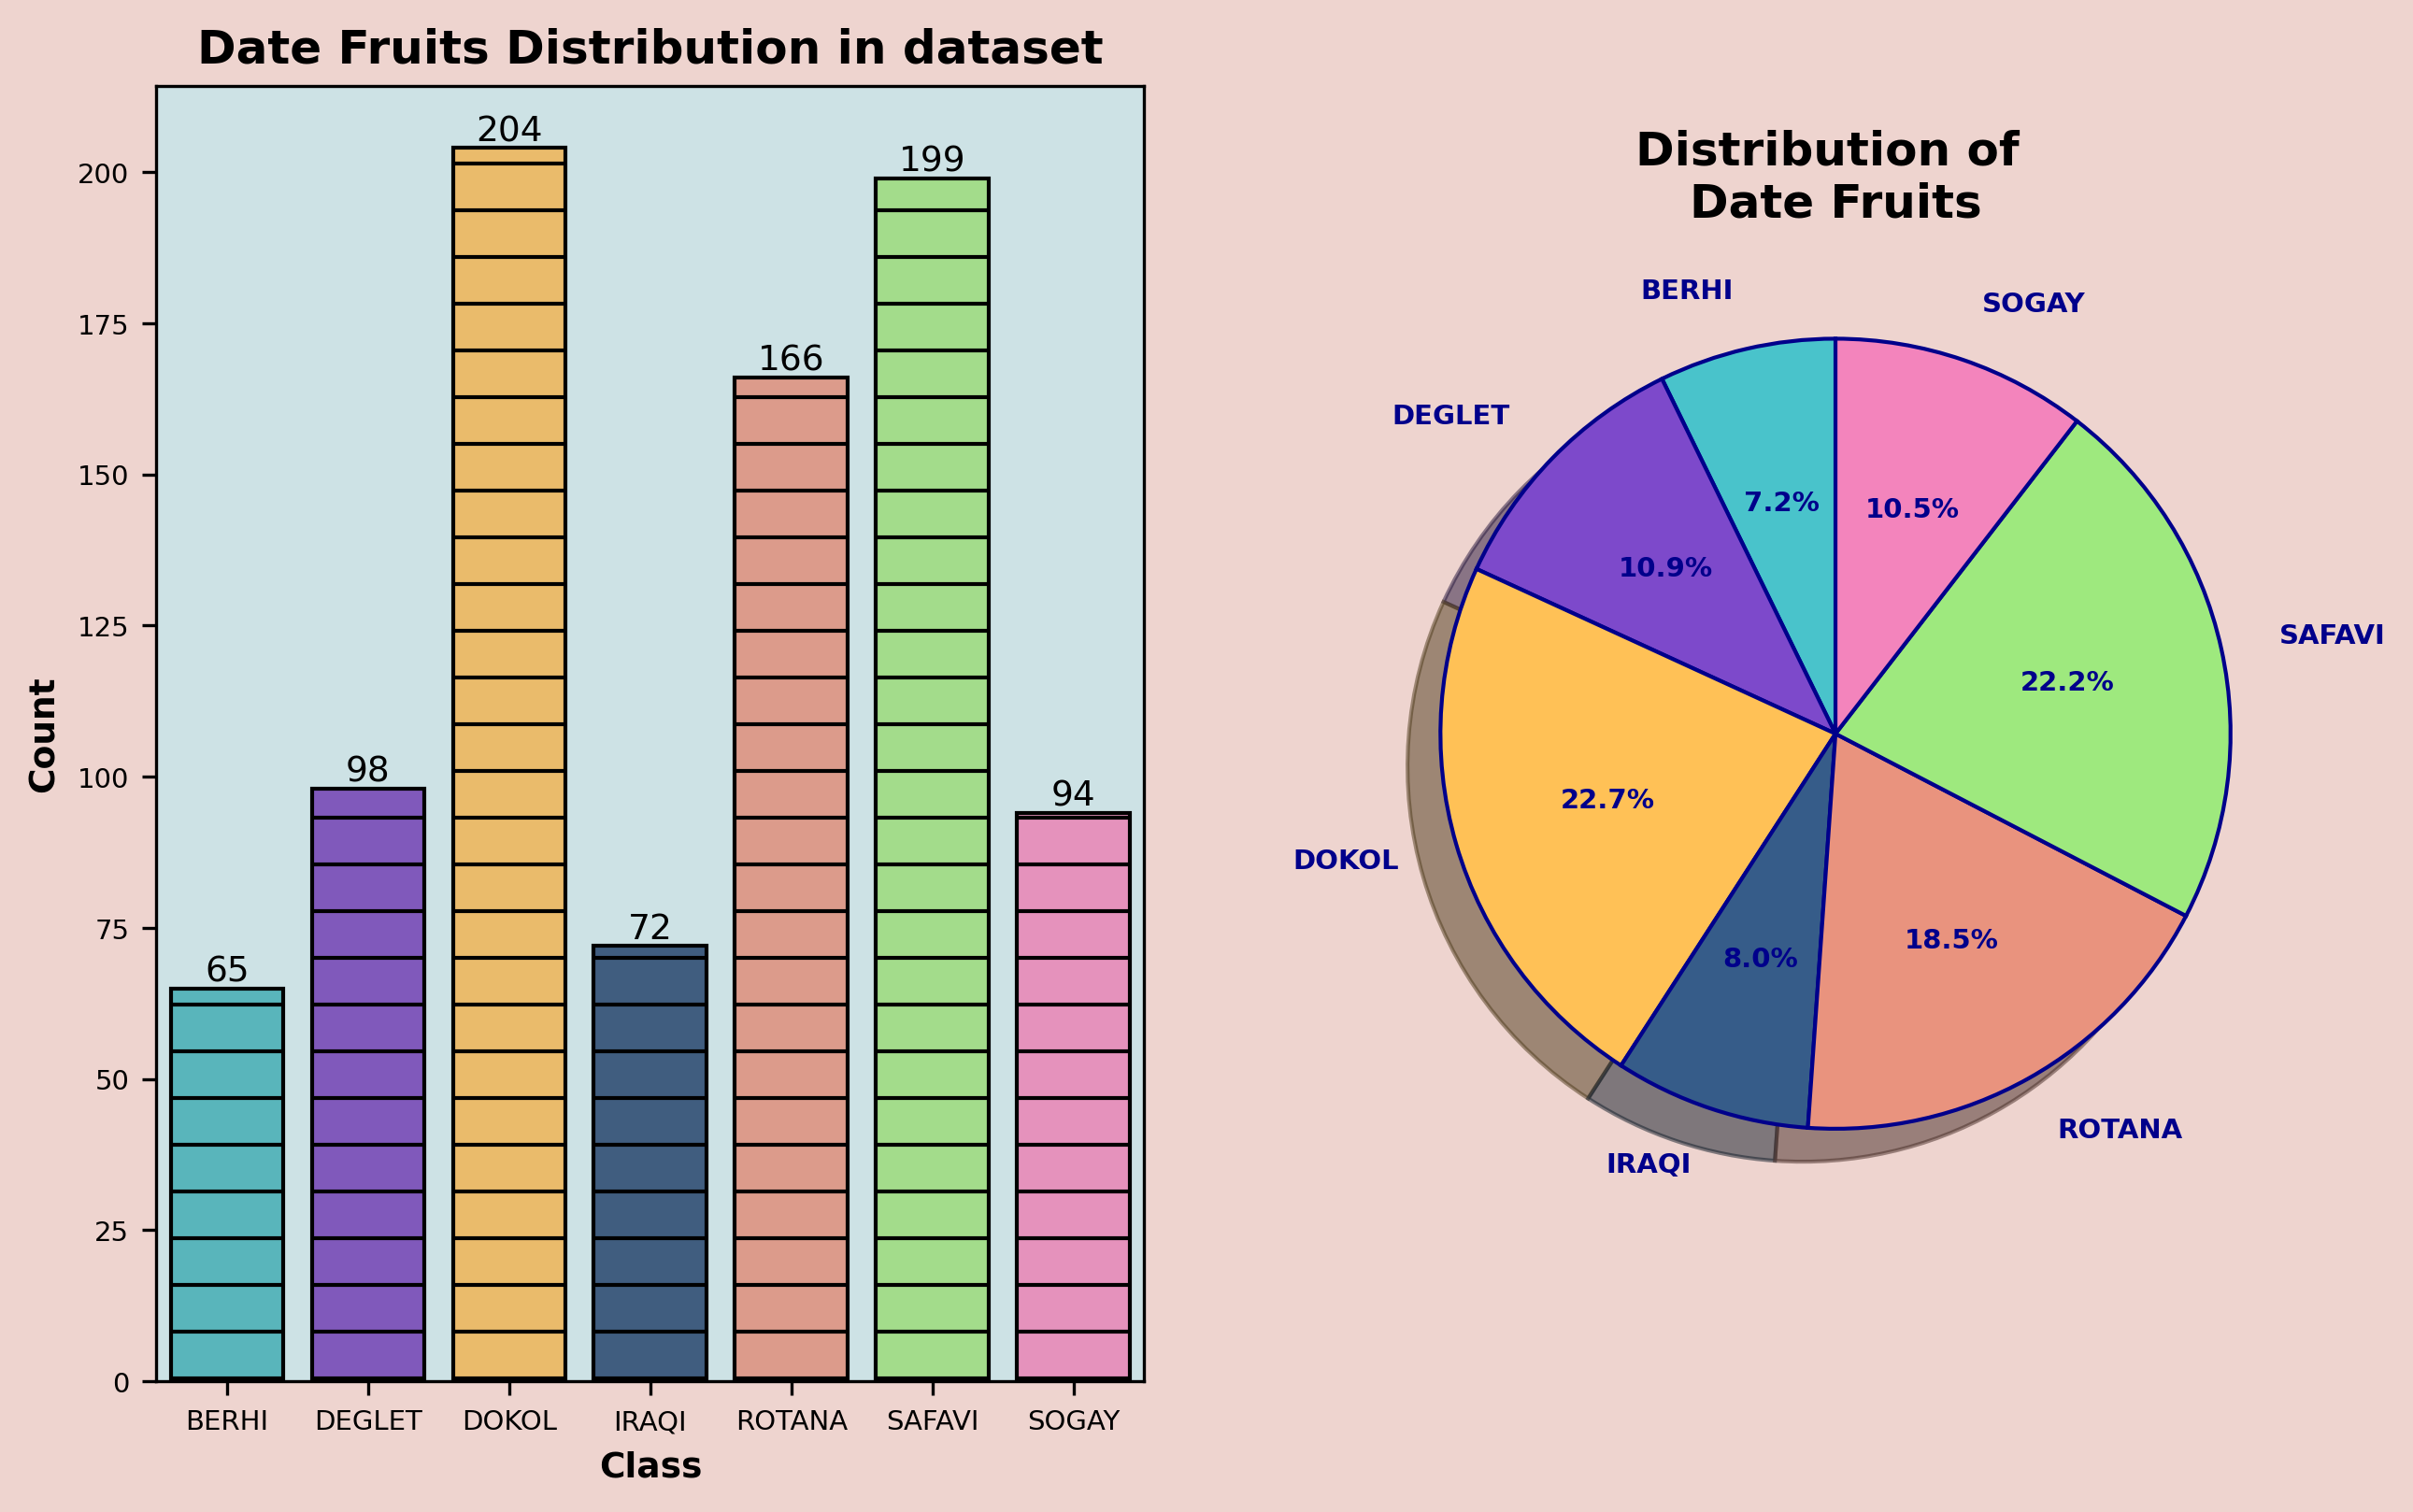

In [12]:
#create a plot with tzo subplots on one axis
fig, ax = plt.subplots(1,2, facecolor='#EED4CF')

# define first subplot
sns.countplot(data=df, x="Class", palette=colors, edgecolor="black", hatch="-", ax=ax[0])

ax[0].set_title("Date Fruits Distribution in dataset", size=12, fontweight="bold")
ax[0].set_xlabel("Class", size=9, fontweight="bold")
ax[0].set_ylabel("Count", size=9, fontweight="bold")
ax[0].tick_params(axis="x", labelsize=7) 
ax[0].tick_params(axis="y", labelsize=7)
ax[0].bar_label(ax[0].containers[0], fmt='%.0f', color="black", fontsize=9)

#define second plot

plt.pie(class_values, explode=None, labels=class_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, 
        textprops={'fontsize': 7, "fontweight" : "bold", "color":"darkblue"},  
        wedgeprops={'edgecolor':'darkblue'} ,
        colors=colors, labeldistance=1.15)

plt.title("Distribution of \nDate Fruits", size=12, fontweight="bold")

Let's choose some features to check the distributions between the classes.

I only choose 3 features(Area, Perimeter Solidity, convex area and Eccentricity).

In [16]:
features = ['AREA', 'PERIMETER','SOLIDITY', 'CONVEX_AREA', 'ECCENTRICITY']

def displot_(feature):
    with sns.axes_style("white", rc={"axes.facecolor":"#413D41",'figure.facecolor':'#EED4CF'}):
        sns.displot(data=df, x=feature, hue="Class", kind="kde", palette=colors, fill=True, legend=True
                                 ,aspect=2)
        plt.title("Distribution of " + feature + " by Class\n(Combined)", size=18, fontweight="bold", color="#413D41")

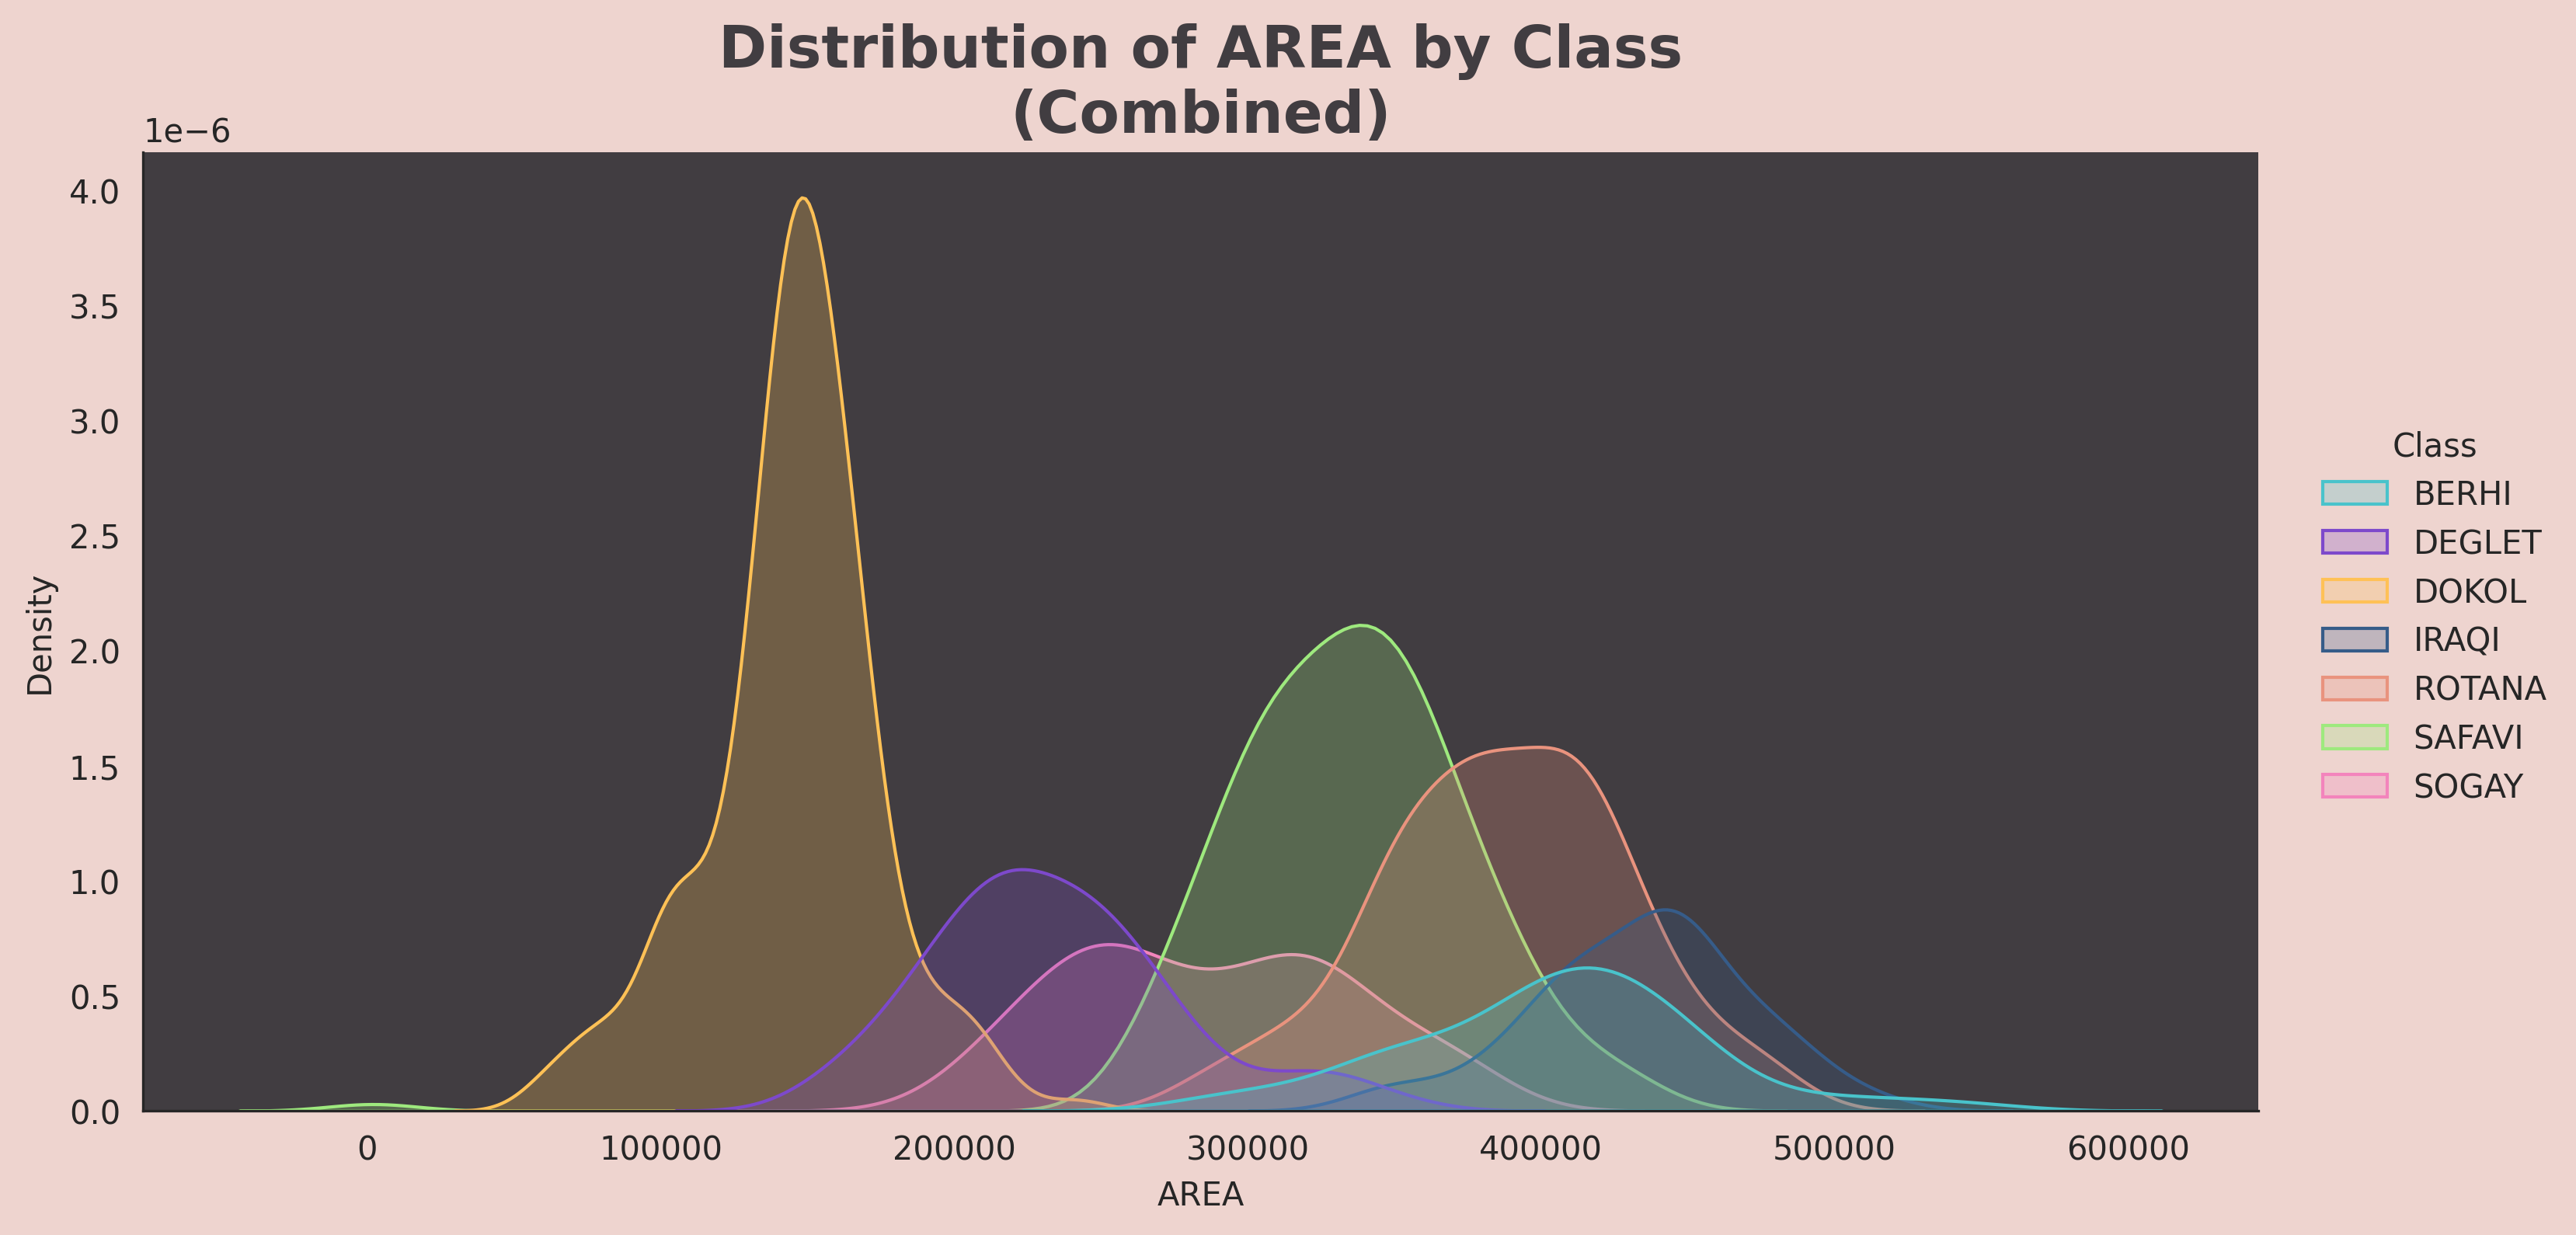

In [18]:
displot_('AREA')

We note that DOKOL dates tend to be found ;ore densely in areas between 100000 and 200000

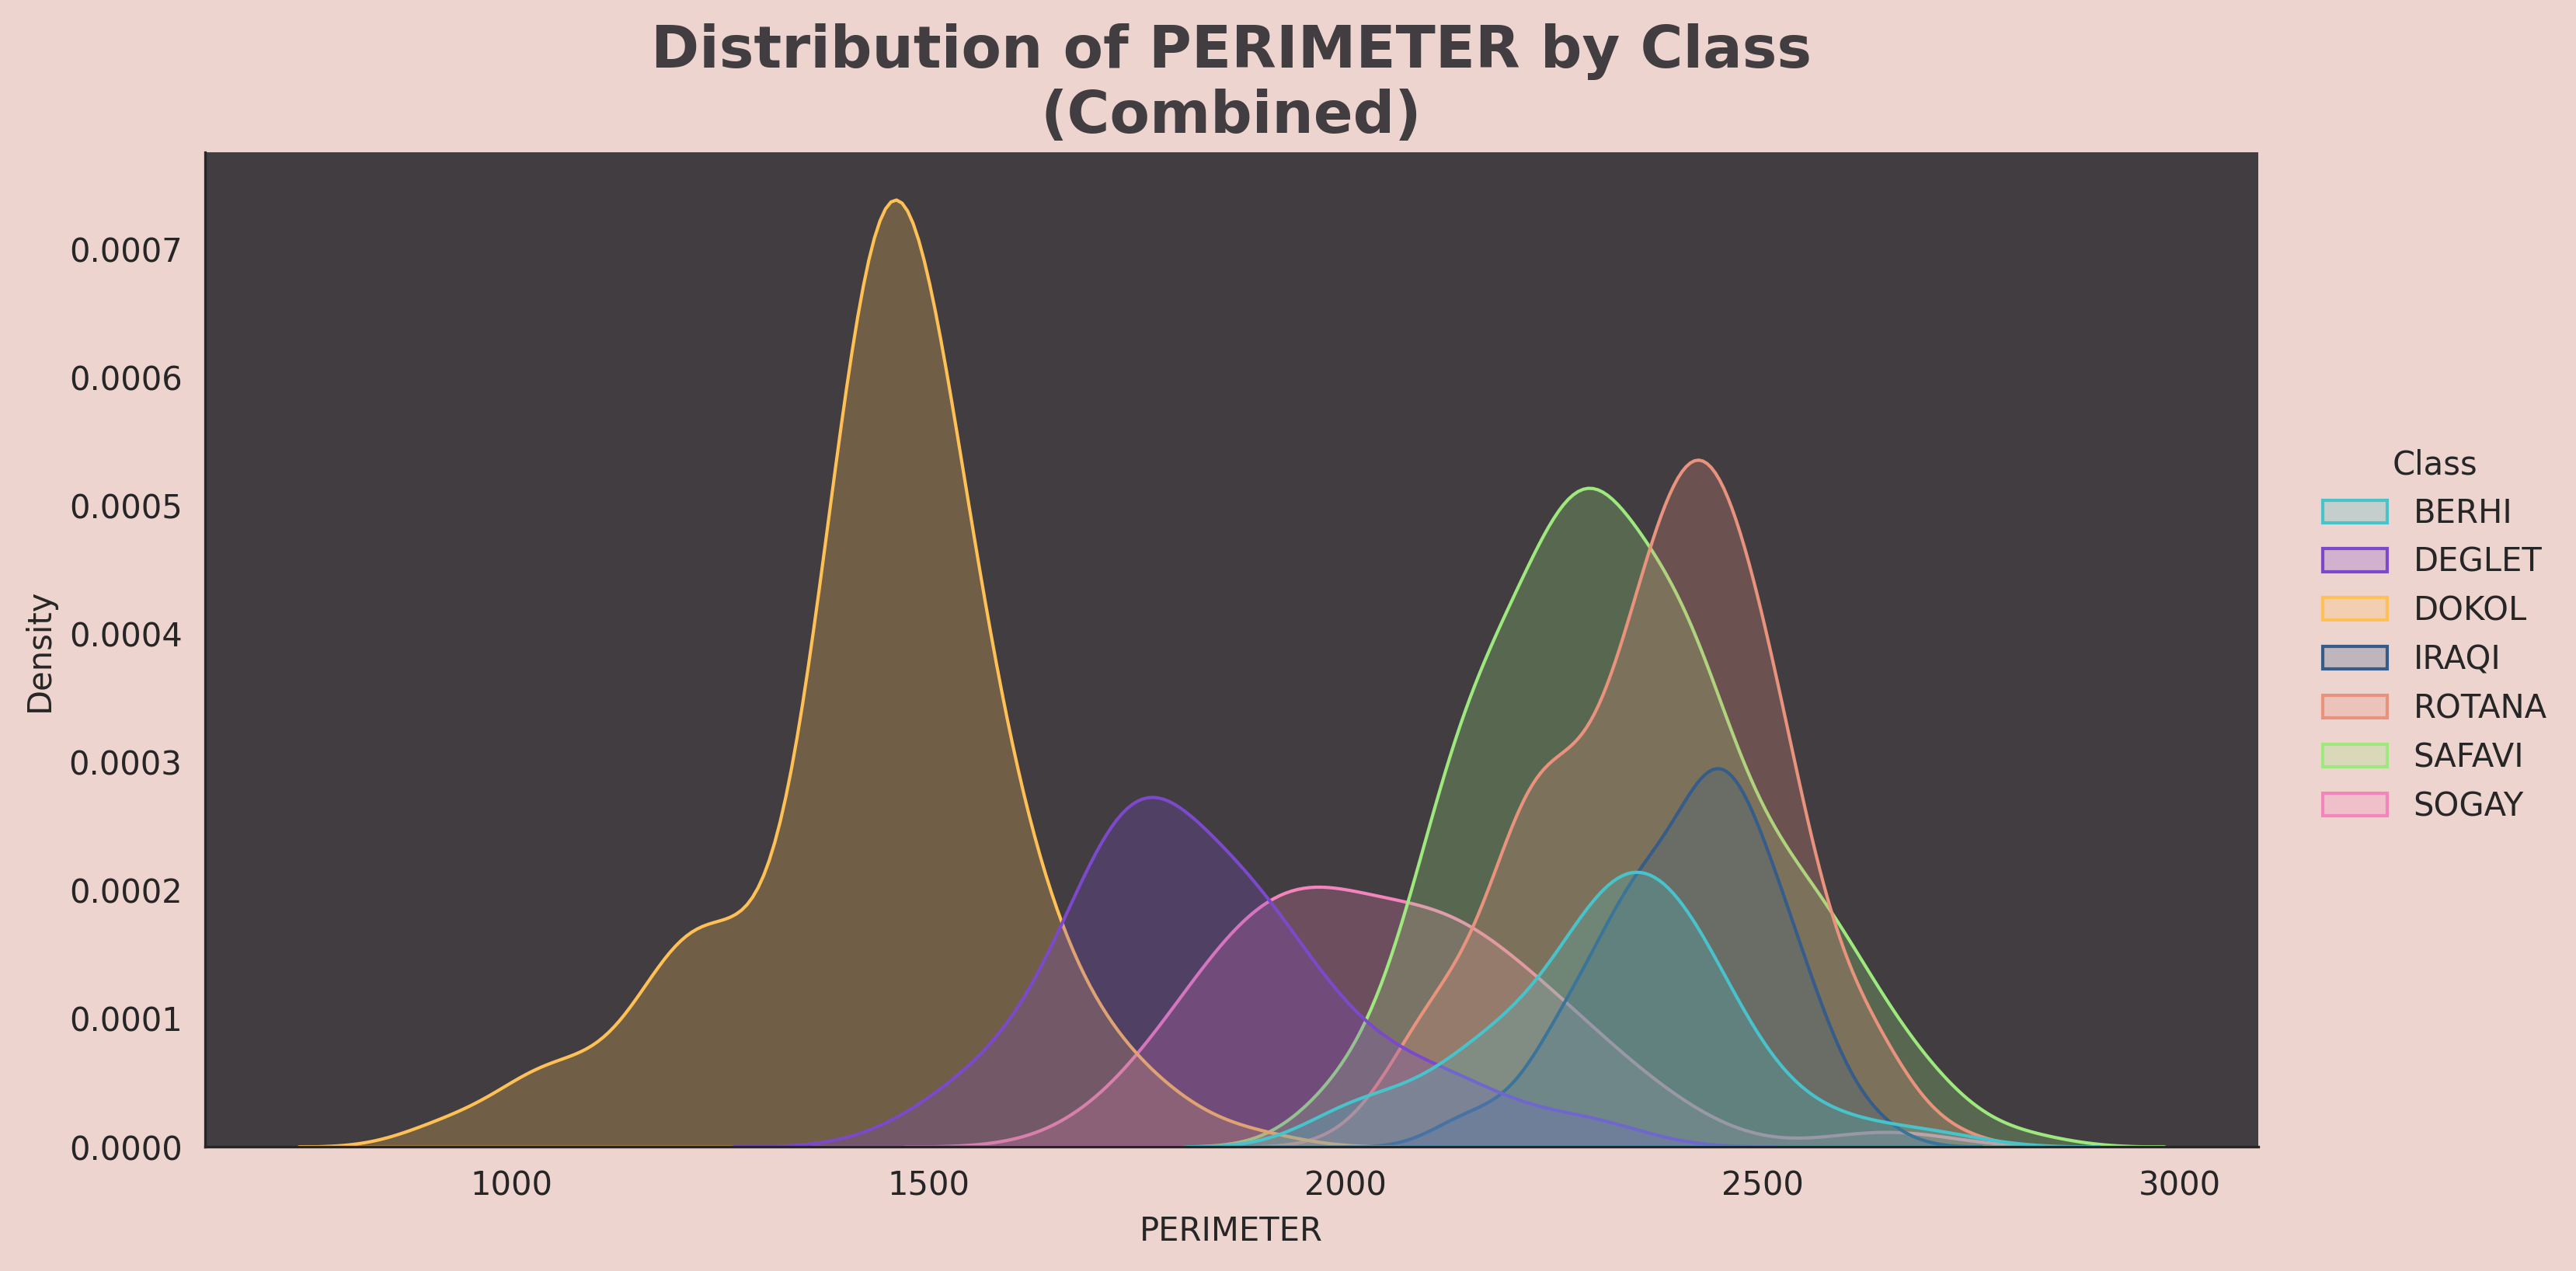

In [19]:
displot_('PERIMETER')

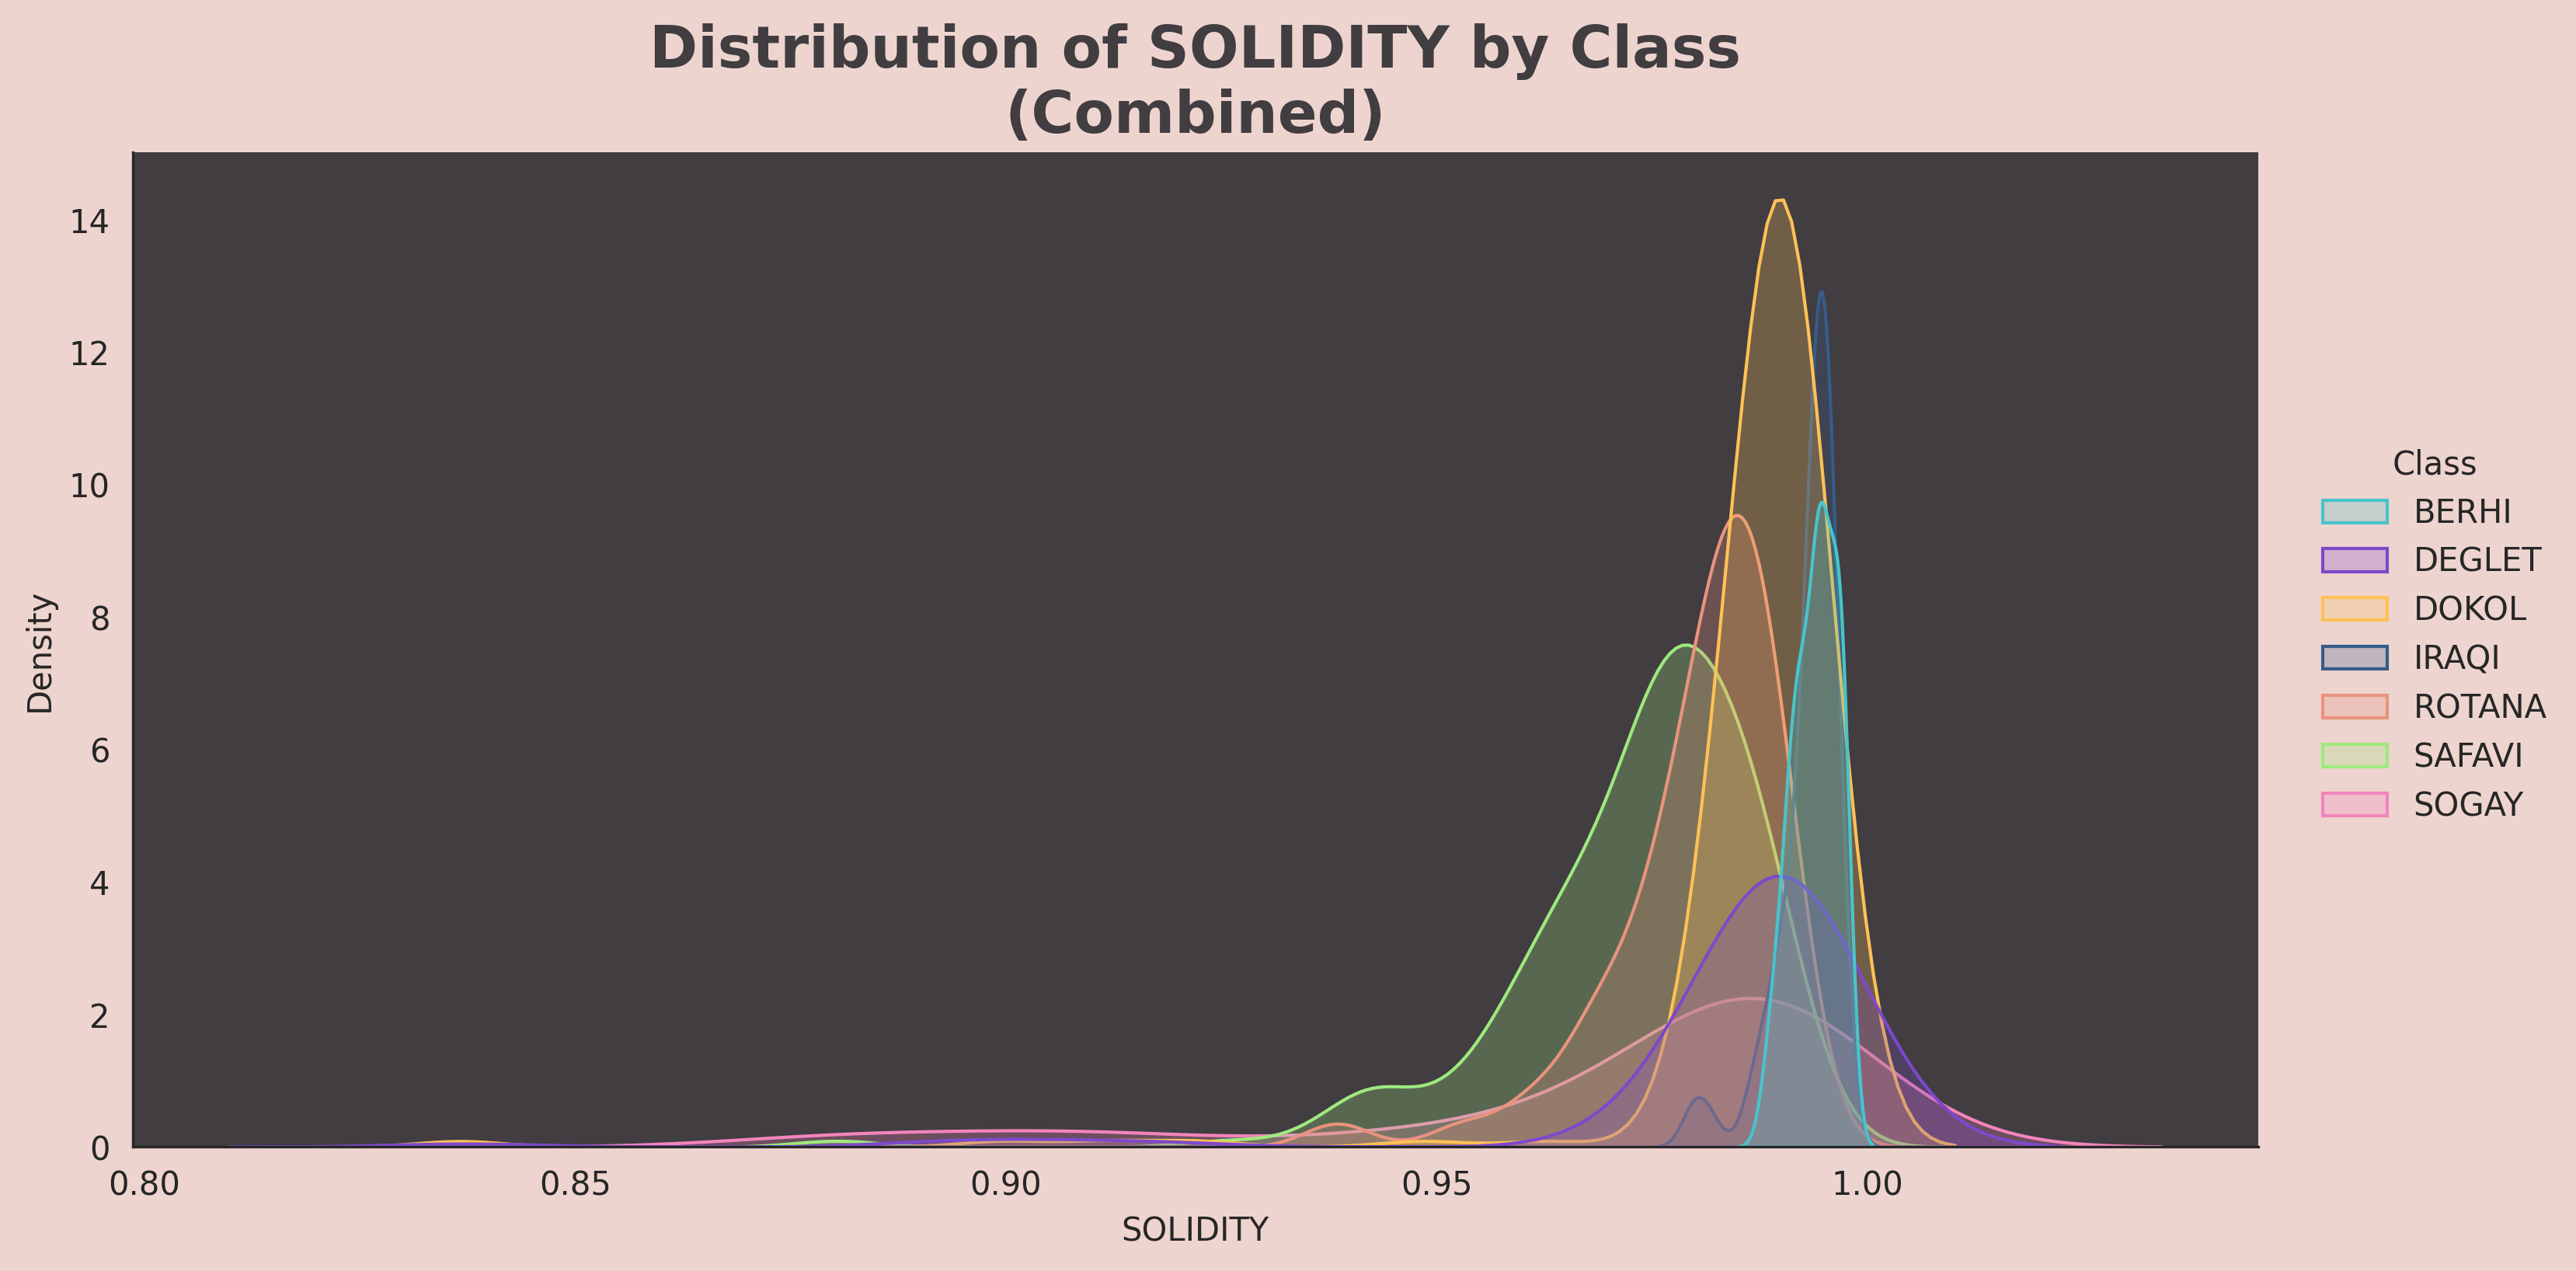

In [20]:
displot_('SOLIDITY')

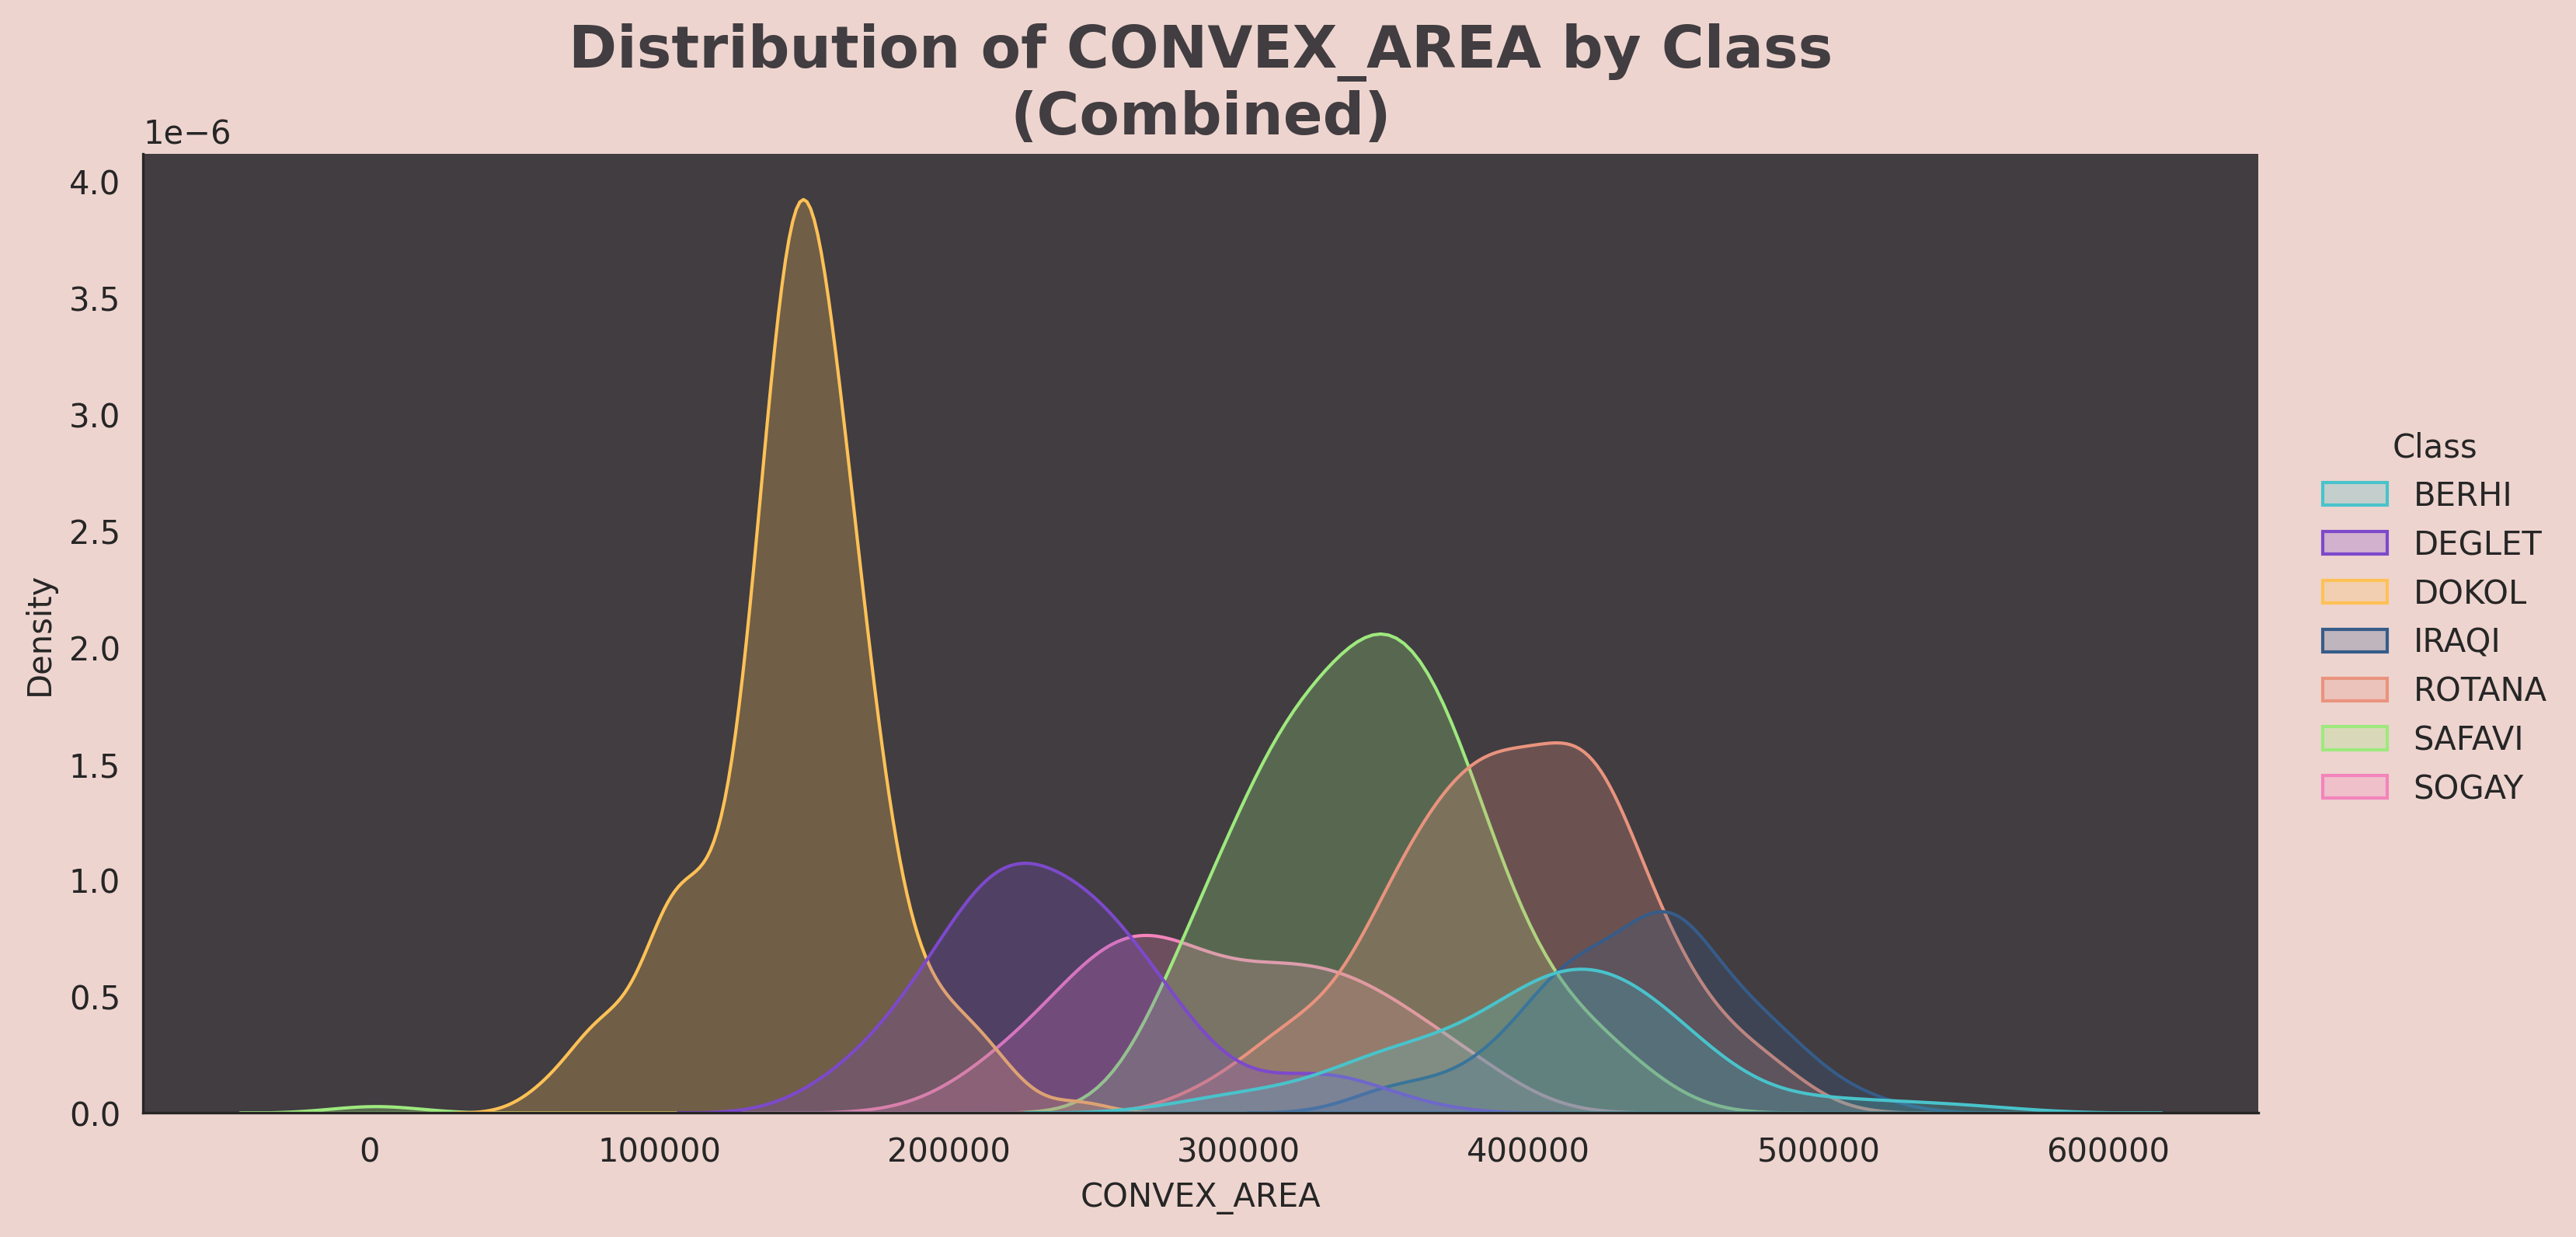

In [21]:
displot_('CONVEX_AREA')

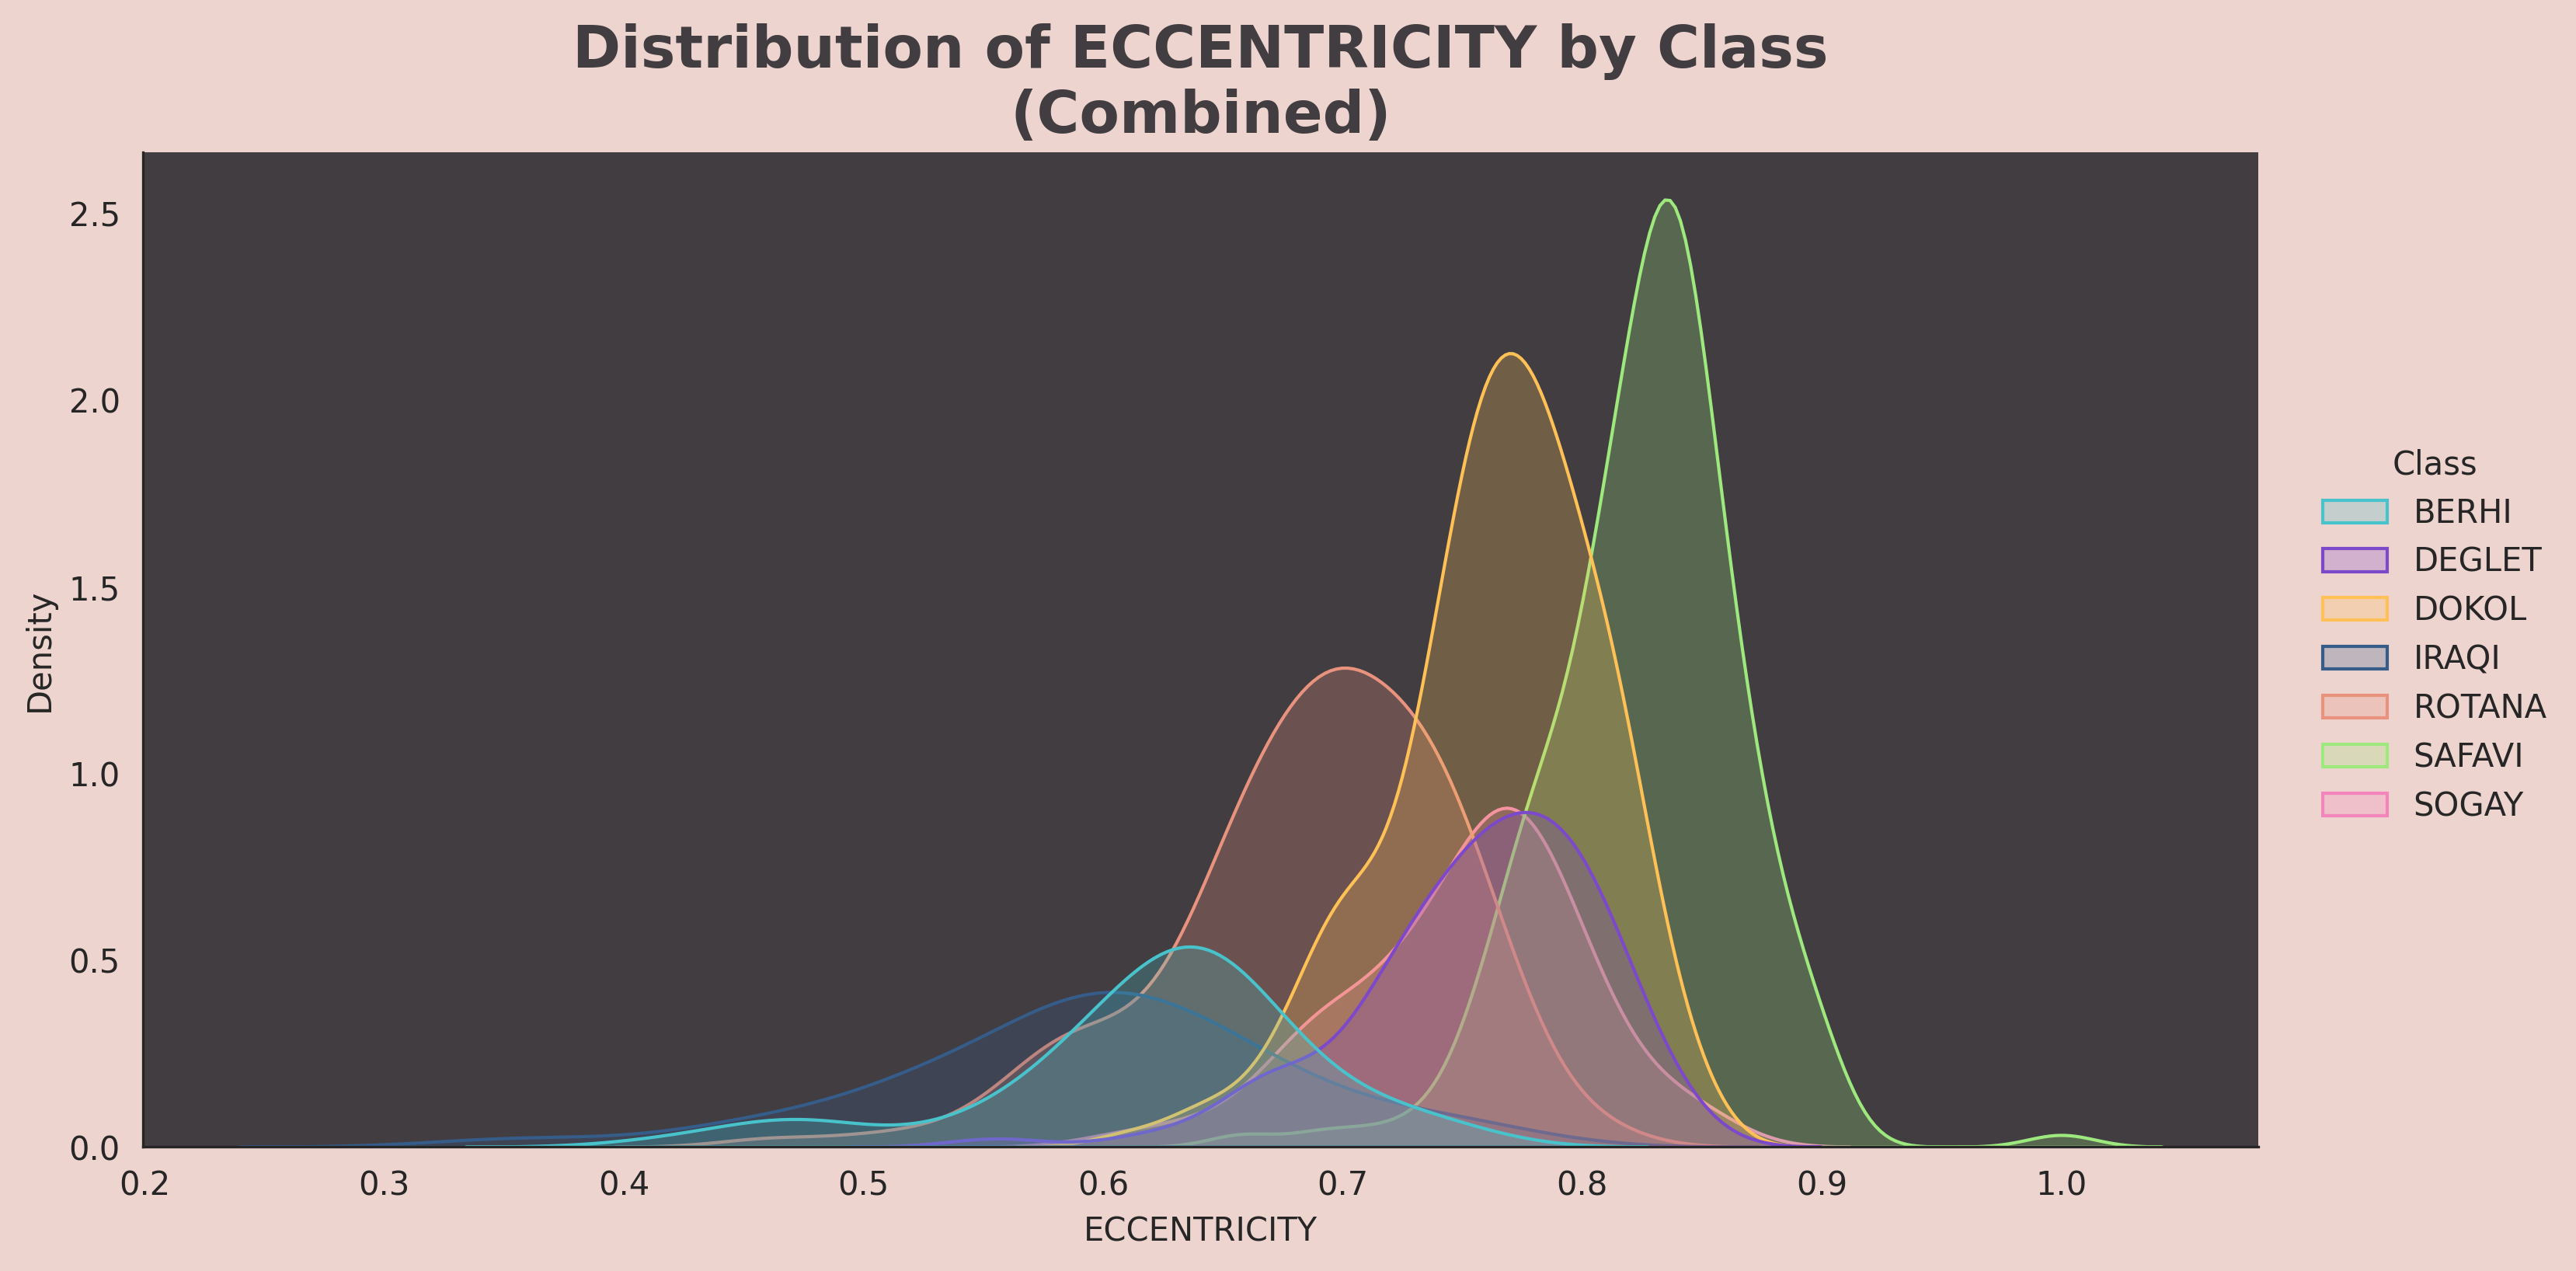

In [22]:
displot_('ECCENTRICITY')

Thast's it for the visualisation. Next step is to build a model 